## Line chart bqplot

In [1]:
import numpy as np
from bqplot import pyplot as plt

In [2]:
plt.figure(1, title='Line Chart')
np.random.seed(0)
n = 200
x = np.linspace(0.0, 10.0, n)
y = np.cumsum(np.random.randn(n))
plt.plot(x, y)
plt.show()

## ipywidgets

In [3]:
import numpy as np
n = 200

x = np.linspace(0.0, 10.0, n)
y = np.cumsum(np.random.randn(n)*10).astype(int)


In [4]:
import ipywidgets as widgets

In [5]:
label_selected = widgets.Label(value="Selected: 0")
label_selected

Label(value='Selected: 0')

In [6]:
import numpy as np
from bqplot import pyplot as plt
import bqplot

fig = plt.figure( title='Histogram')
np.random.seed(0)
hist = plt.hist(y, bins=25)
hist.scales['sample'].min = float(y.min())
hist.scales['sample'].max = float(y.max())
display(fig)
fig.layout.width = 'auto'
fig.layout.height = 'auto'
fig.layout.min_height = '300px' # so it shows nicely in the notebook
fig.layout.flex = '1'

Figure(axes=[Axis(orientation='vertical', scale=LinearScale()), Axis(scale=LinearScale(max=24.0, min=-299.0))]…

## ipywidgets

In [ ]:
from ipywidgets import GridspecLayout, Button, BoundedIntText, Valid, Layout, Dropdown

In [ ]:
def create_expanded_button(description, button_style):
    return Button(description=description, button_style=button_style, layout=Layout(height='auto', width='auto'))
 


In [ ]:
rows = 11
columns = 6

gs = GridspecLayout(rows, columns)


In [ ]:
def on_result_change(change):
    row = int(change["owner"].layout.grid_row)
    gs[row, 5].value = gs[0, 0].value * row == change["new"]
    
def on_multipler_change(change):
    for i in range(1, rows):
        gs[i, 0].description = str(change["new"])
        gs[i, 4].max = change["new"] * 10
        gs[i, 4].value = 1
        gs[i, 4].step = change["new"]
        gs[i, 5].value = False


In [ ]:
gs[0, 0] = Dropdown(
    options=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    value=2,
)
gs[0, 0].observe(on_multipler_change, names="value")
multiplier = gs[0, 0].value


In [ ]:
for i in range(1, rows):
    gs[i, 0] = create_expanded_button(str(multiplier), "")
    gs[i, 1] = create_expanded_button("*", "")
    gs[i, 2] = create_expanded_button(str(i), "info")
    gs[i, 3] = create_expanded_button("=", "")

    gs[i, 4] = BoundedIntText(
        min=0,
        max=multiplier * 10,
        layout=Layout(grid_row=str(i)),
        value=1,
        step=multiplier,
        disabled=False
    )

    gs[i, 5] = Valid(
        value=False,
        description='Valid!',
    )

    gs[i, 4].observe(on_result_change, names='value')

gs

GridspecLayout(children=(Dropdown(index=1, layout=Layout(grid_area='widget001'), options=(1, 2, 3, 4, 5, 6, 7,…

## interactive

In [ ]:
from ipywidgets import HBox, VBox, IntSlider, interactive_output
from IPython.display import display


In [ ]:
a = IntSlider()
b = IntSlider()

def f(a, b):
    print("{} * {} = {}".format(a, b, a * b))

out = interactive_output(f, { "a": a, "b": b })

display(HBox([VBox([a, b]), out]))

## ipympl 

In [ ]:
!pip install ipympl --quiet

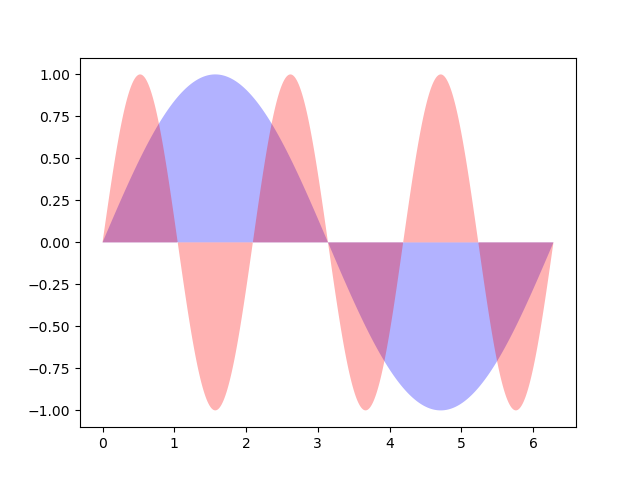

In [ ]:
%matplotlib widget
import ipympl

import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(0, 2 * np.pi, 500)
y1 = np.sin(x)
y2 = np.sin(3 * x)

fig, ax = plt.subplots()
ax.fill(x, y1, 'b', x, y2, 'r', alpha=0.3)
plt.show()

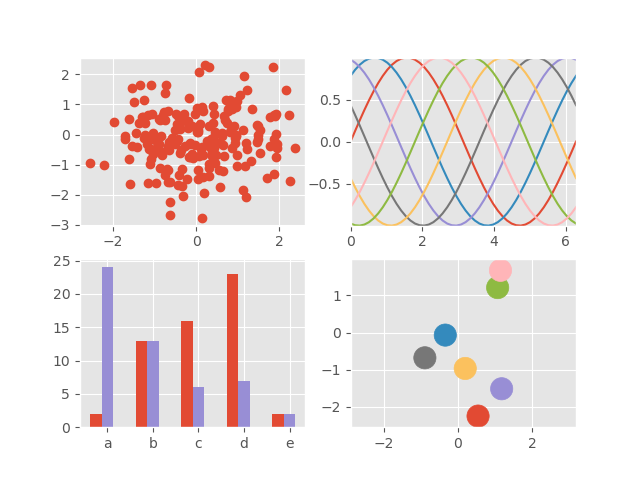

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('ggplot')

fig, axes = plt.subplots(ncols=2, nrows=2)
ax1, ax2, ax3, ax4 = axes.ravel()

# scatter plot (Note: `plt.scatter` doesn't use default colors)
x, y = np.random.normal(size=(2, 200))
ax1.plot(x, y, 'o')

# sinusoidal lines with colors from default color cycle
L = 2 * np.pi
x = np.linspace(0, L)
ncolors = len(plt.rcParams['axes.prop_cycle'])
shift = np.linspace(0, L, ncolors, endpoint=False)
for s in shift:
    ax2.plot(x, np.sin(x + s), '-')
ax2.margins(0)

# bar graphs
x = np.arange(5)
y1, y2 = np.random.randint(1, 25, size=(2, 5))
width = 0.25
ax3.bar(x, y1, width)
ax3.bar(x + width, y2, width,
        color=list(plt.rcParams['axes.prop_cycle'])[2]['color'])
ax3.set_xticks(x + width)
ax3.set_xticklabels(['a', 'b', 'c', 'd', 'e'])

# circles with colors from default color cycle
for i, color in enumerate(plt.rcParams['axes.prop_cycle']):
    xy = np.random.normal(size=2)
    ax4.add_patch(plt.Circle(xy, radius=0.3, color=color['color']))

ax4.axis('equal')
ax4.margins(0)

plt.show()

## ipyvolume

In [ ]:
!pip install ipyvolume --quiet

In [ ]:
import ipyvolume as ipv
ipv.examples.example_ylm();

/opt/conda/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


## multiple widgets

In [ ]:
import ipywidgets as widgets
def generate(n):
    widget = []
    for i in range(n):
        inner = []
        for j in range(n):
            inner.append(widgets.Button(description=f'{i*n+j+1}'))
        widget.append(widgets.HBox(inner))

    return widgets.VBox(widget)
generate(5)

## query_string

In [ ]:
import os
from urllib.parse import parse_qs
import IPython.display

In [ ]:
query_string = os.environ.get('QUERY_STRING', '')
parameters = parse_qs(query_string)
print("query string parameters:", parameters)

query string parameters: {}


In [ ]:
# parameters is a dict of lists
username = parameters.get('username', ['Kim'])[0]
print(f'Hi {username}')

Hi Kim


In [ ]:
server = os.environ.get('SERVER_NAME', 'localhost') 
url = "http://" + server

port = os.environ.get('SERVER_PORT', '')
if port:
    url += ":" + port

path = os.environ.get('SCRIPT_NAME', '')
url += path

                          
IPython.display.HTML(data=f"""
<a href="{url}?username=Riley">Link to myself as user Riley</a>
""")
 

## reveal

In [38]:
import ipywidgets as widgets
slider = widgets.FloatSlider(description='x')
text = widgets.FloatText(disabled=True, description='$x^2$')
text.disabled
def compute(*ignore):
    text.value = str(slider.value**2)
slider.observe(compute, 'value')
slider.value = 14
widgets.VBox([slider, text])